# Outliers

There are two main ways that outliers can affect Prophet forecasts. Here we make a forecast on the logged Wikipedia visits to the R page from before, but with a block of bad data:

In [2]:
import pandas as pd
from fbprophet import Prophet

In [4]:
df = pd.read_csv('./examples/example_wp_log_R_outliers1.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
e:\4.sdk\miniconda3_64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


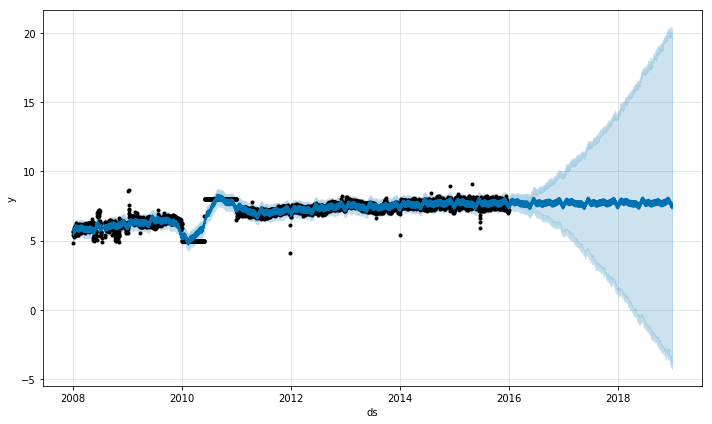

In [5]:
forecast = m.predict(future)
fig = m.plot(forecast)
fig

The best way to handle outliers is to remove them - Prophet has no problem with missing data. If you set their values to `NA` in the history but leave the datas in `future`, then Prophet will give you a prediction fore their values.

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
e:\4.sdk\miniconda3_64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


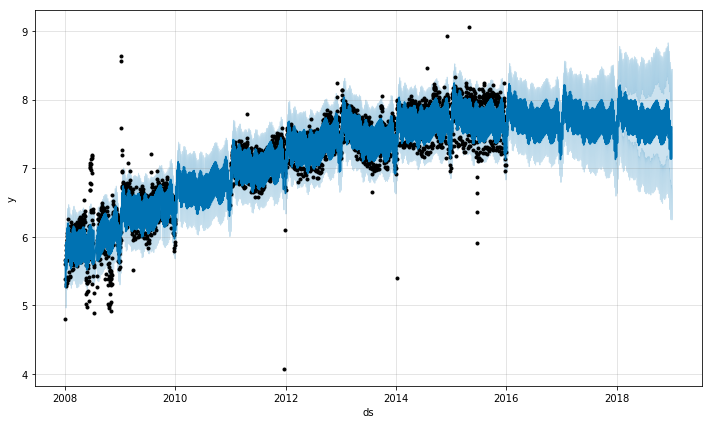

In [6]:
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None
model = Prophet().fit(df)
fig = model.plot(model.predict(future))
fig

In the above example the outliers messed up the uncertainty estimation but did not impact the mian forecast `yhat`. This isn't always the case, as in this example with added outliers:

In [8]:
# Python
df = pd.read_csv('./examples/example_wp_log_R_outliers2.csv')
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
e:\4.sdk\miniconda3_64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


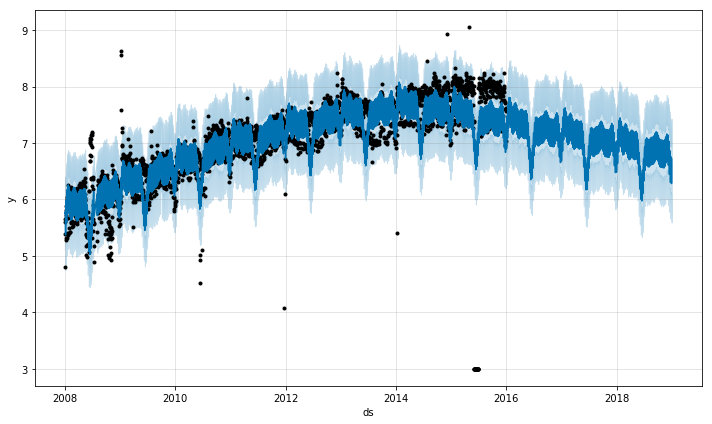

In [9]:
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig = m.plot(forecast)
fig

Here a group of extrem outliers in June 2015 mess up the seasonality estimate, so their effect reverberates into the future forever. Again the right approach is to remove them:

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
e:\4.sdk\miniconda3_64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


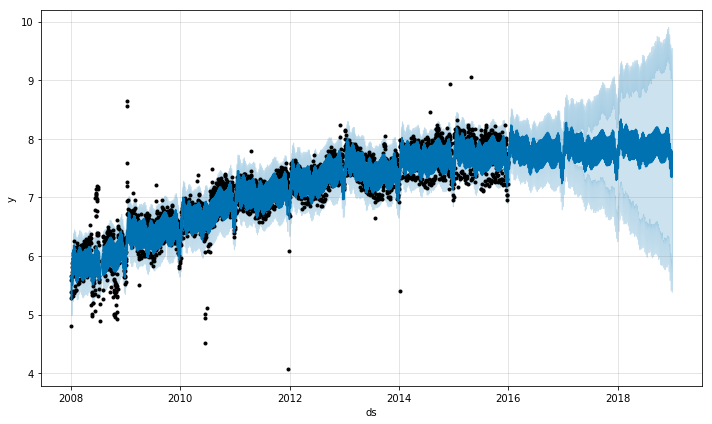

In [10]:
# Python
df.loc[(df['ds'] > '2015-06-01') & (df['ds'] < '2015-06-30'), 'y'] = None
m = Prophet().fit(df)
fig = m.plot(m.predict(future))
fig